w: 0.9134, b: 1.6124, loss: 0.3496
w: 1.2128, b: 1.6066, loss: 0.2526
w: 1.4361, b: 1.5159, loss: 0.1942
w: 1.6285, b: 1.4287, loss: 0.1494
w: 1.7970, b: 1.3515, loss: 0.1150
w: 1.9447, b: 1.2838, loss: 0.0885
w: 2.0743, b: 1.2244, loss: 0.0681
w: 2.1880, b: 1.1723, loss: 0.0524
w: 2.2877, b: 1.1266, loss: 0.0403
w: 2.3752, b: 1.0864, loss: 0.0310


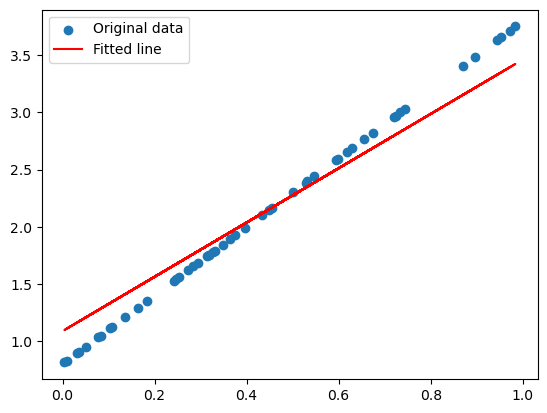

In [8]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

# 生成数据
x = torch.rand([50])
y = 3 * x + 0.8

# 初始化参数
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

class LinearModel:
    
    def __init__(self, num_epochs, learning_rate):
        self.num_epochs = num_epochs
        self.learning_rate = learning_rate
        
    def loss_fn(self, y, y_pred):
        loss = (y_pred - y).pow(2).mean()
        for param in [w, b]:
            if param.grad is not None:
                param.grad.data.zero_()
        loss.backward()
        return loss.data

    def optimize(self):
        w.data -= self.learning_rate * w.grad.data
        b.data -= self.learning_rate * b.grad.data

    def train(self):
        for epoch in range(self.num_epochs):
            y_pred = w * x + b
            loss = self.loss_fn(y, y_pred)
            self.optimize()
            if (epoch + 1) % 100 == 0:
                print(f"w: {w.item():.4f}, b: {b.item():.4f}, loss: {loss:.4f}")

# 实例化并训练模型
model = LinearModel(num_epochs=1000, learning_rate=0.01)
model.train()

# 绘制结果
plt.scatter(x.numpy(), y.numpy(), label='Original data')
plt.plot(x.numpy(), (w * x + b).detach().numpy(), label='Fitted line', color='red')
plt.legend()
plt.show()
